# 1. Load Libraries

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

# 2. Load Data

In [2]:
file_path = (r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\12. My Learnings\Portfolio Projects to Showcase\IITK-Assignments\marketing campaigns\Data Dictionary - Response to marketing campaigns.xlsx")
df_data_dic = pd.read_excel(file_path)
df_data_dic

,Variable,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,number of small children in customer's househo...
6,Teenhome,no of teenagers in customer's house
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,number of days since the last purchase
9,MntWines,amount spent on wine in last 2 years


In [4]:
file_path = (r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\12. My Learnings\Portfolio Projects to Showcase\IITK-Assignments\marketing campaigns\marketing_data.csv")
df_mc = pd.read_csv(file_path)
df_mc.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
- we have 2 datasets 
- data dict which provide information on metdata & definitions
- campaigns is main data set, where we perform our analysis to understand pattern inside data for meaningfull decision making

# 3. Understanding essecence of data 

In [6]:
df = df_mc.copy(deep=True)

In [7]:
df.shape

(2240, 28)

In [8]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US


In [9]:
df.tail(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [11]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [16]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [23]:
df.columns = df.columns.str.strip()

In [24]:
df.columns = df.columns.str.lower()

In [25]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country'],
      dtype='object')

In [27]:
df[df['income'].isna()]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [31]:
def calculate_null_perc(col):
    null_rows = df[df[col].isnull()].shape[0]
    total_rows = df[col].shape[0]
    null_perc = (null_rows*100/total_rows)
    return null_perc

In [32]:
calculate_null_perc('income')

1.0714285714285714

In [33]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country'],
      dtype='object')

In [38]:
category_cols = ['education', 'marital_status','country']

for i in category_cols:
    print(f"{i}: {df[i].value_counts()} \n")

education: education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64 

marital_status: marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64 

country: country
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: count, dtype: int64 



In [39]:
category_cols = ['education', 'marital_status','country']

for i in category_cols:
    print(f"{i}: {df[i].unique()} \n")

education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic'] 

marital_status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd'] 

country: ['SP' 'CA' 'US' 'AUS' 'GER' 'IND' 'SA' 'ME'] 



In [44]:
category_cols = ['education', 'marital_status','country']

for i in category_cols:
    print(f"{i}: {df[i].nunique()} \n")

education: 5 

marital_status: 8 

country: 8 



In [43]:
df[df['education'] == '2n Cycle'].replace('2n Cycle', '2nd_Cycle')

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
6,4073,1954,2nd_Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
10,2079,1947,2nd_Cycle,Married,"$81,044.00",0,0,12/27/13,0,450,...,10,1,0,0,0,0,0,0,0,US
18,1473,1960,2nd_Cycle,Single,"$47,823.00",0,1,7/23/13,0,53,...,3,8,0,0,0,0,0,0,0,CA
36,2681,1984,2nd_Cycle,Married,"$65,370.00",0,0,8/1/13,1,71,...,13,1,0,0,0,0,0,0,0,SP
42,1524,1983,2nd_Cycle,Single,"$81,698.00",0,0,3/1/13,1,709,...,5,5,0,0,0,1,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,10001,1985,2nd_Cycle,Together,"$7,500.00",1,0,8/1/12,98,5,...,3,9,0,0,0,0,0,0,0,SP
2229,2106,1974,2nd_Cycle,Married,"$20,130.00",0,0,3/17/14,99,0,...,3,8,0,0,0,0,0,0,0,SP
2230,3363,1974,2nd_Cycle,Married,"$20,130.00",0,0,3/17/14,99,0,...,3,8,0,0,0,0,0,0,0,SP
2233,7829,1900,2nd_Cycle,Divorced,"$36,640.00",1,0,9/26/13,99,15,...,2,5,0,0,0,0,0,0,1,IND


In [46]:
binary_cols = ['acceptedcmp3', 'acceptedcmp4','acceptedcmp5','acceptedcmp1','acceptedcmp2','response','complain']

for i in binary_cols:
    print(f"{i}: {df[i].nunique()} \n")

acceptedcmp3: 2 

acceptedcmp4: 2 

acceptedcmp5: 2 

acceptedcmp1: 2 

acceptedcmp2: 2 

response: 2 

complain: 2 



In [47]:
for i in binary_cols:
    print(f"{i}: {df[i].unique()} \n")

acceptedcmp3: [0 1] 

acceptedcmp4: [0 1] 

acceptedcmp5: [0 1] 

acceptedcmp1: [0 1] 

acceptedcmp2: [0 1] 

response: [1 0] 

complain: [0 1] 



In [ ]:
- observations:
- income feature is object dtype, ideally this needs to be transformed to 'int' dype, replace '$' with space
- education feature '2n cycle' transform to '2nd Cycle'
- certain feature/unneccessary feature needs to be removed for our analysis like (id, dt_customer)
- certain features to be added (age, dependents, total_spend, total_orders, etc)

# 4. Transformation of data 

In [127]:
df.head(3)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US


In [166]:
df1 = df.copy(deep=True)

In [167]:
df1.shape

(2240, 28)

In [168]:
df1.drop(['id','dt_customer'], axis = 1, inplace = True)

In [169]:
df1['education'] = df1['education'].replace('2n Cycle', '2nd Cycle')

In [170]:
df1['income'] = df1['income'].str.replace('[$,.]','', regex=True)

In [172]:
df_without_nulls = df1[~df1['income'].isnull()]
df_without_nulls.shape

(2216, 26)

In [173]:
df_with_nulls = df1[df1['income'].isnull()]
df_with_nulls.shape

(24, 26)

In [184]:
df_without_nulls['income'] = df_without_nulls['income'].astype('int64')

C:\Users\aravit01\AppData\Local\Temp\ipykernel_44860\1184850592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_nulls['income'] = df_without_nulls['income'].astype('int64')


In [188]:
df_without_nulls['income'] = df_without_nulls['income'].apply(lambda x: x/100)

C:\Users\aravit01\AppData\Local\Temp\ipykernel_44860\2777741167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_nulls['income'] = df_without_nulls['income'].apply(lambda x: x/100)


In [194]:
df_without_nulls['income'].mean()


52247.25135379061

In [193]:
df_without_nulls['income'].median()

51381.5

In [202]:
df_with_nulls['income'].fillna(df_without_nulls['income'].mean(), inplace = True)

C:\Users\aravit01\AppData\Local\Temp\ipykernel_44860\1330711869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_nulls['income'].fillna(df_without_nulls['income'].mean(), inplace = True)


In [203]:
df_with_nulls.head(3)

,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
134,1957,PhD,Married,52247.251354,2,1,4,230,42,192,...,8,9,0,0,0,0,0,0,0,GER
262,1983,Graduation,Married,52247.251354,1,0,11,5,5,6,...,2,7,0,0,0,0,0,0,0,US
394,1972,PhD,Together,52247.251354,1,0,17,25,1,13,...,3,7,0,0,0,0,0,0,0,AUS


In [208]:
df2 = pd.concat([df_without_nulls,df_with_nulls], axis = 0)
df2.shape

(2240, 26)

# 5. feature addition/subtraction

In [210]:
df2['age'] = df2['year_birth'].apply(lambda x: 2024 - x)

In [216]:
df2['dependents'] = df2['kidhome'] + df2['teenhome']

In [219]:
df2['total_spend'] = df2['mntwines'] + df2['mntfruits'] + df2['mntmeatproducts'] + df2['mntsweetproducts'] + df2['mntgoldprods']

In [220]:
df2['total_purchaes'] = df2['numdealspurchases'] + df2['numstorepurchases'] + df2['numwebpurchases']

In [215]:
df2['kidhome'].describe()

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: kidhome, dtype: float64

In [217]:
df2.head(3)

,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,dependents
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,0,0,0,0,0,1,0,SP,54,0
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,...,0,0,0,0,1,1,0,CA,63,0
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,...,0,0,0,0,0,0,0,US,66,1


In [221]:
df2['kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [222]:
df2['teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [218]:
df2.columns

Index(['year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'response', 'complain', 'country', 'age', 'dependents'],
      dtype='object')

In [223]:
df2.shape

(2240, 30)

In [224]:
df3 = df2.drop(['year_birth', 'kidhome','teenhome'], axis = 1)
df3.shape

(2240, 27)

# 6. Understanding the distribution of data

In [225]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2170
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            2240 non-null   object 
 1   marital_status       2240 non-null   object 
 2   income               2240 non-null   float64
 3   recency              2240 non-null   int64  
 4   mntwines             2240 non-null   int64  
 5   mntfruits            2240 non-null   int64  
 6   mntmeatproducts      2240 non-null   int64  
 7   mntfishproducts      2240 non-null   int64  
 8   mntsweetproducts     2240 non-null   int64  
 9   mntgoldprods         2240 non-null   int64  
 10  numdealspurchases    2240 non-null   int64  
 11  numwebpurchases      2240 non-null   int64  
 12  numcatalogpurchases  2240 non-null   int64  
 13  numstorepurchases    2240 non-null   int64  
 14  numwebvisitsmonth    2240 non-null   int64  
 15  acceptedcmp3         2240 non-null   int64 

In [227]:
df3.columns

Index(['education', 'marital_status', 'income', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country', 'age', 'dependents',
       'total_spend', 'total_purchaes'],
      dtype='object')

In [232]:
category_cols

['education', 'marital_status', 'country']

In [240]:
df3[category_cols]

,education,marital_status,country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP
...,...,...,...
1967,Master,Together,GER
1983,Graduation,Together,AUS
2139,Graduation,Single,AUS
2165,Graduation,Single,AUS


## 6.1 Distribution of categorical features

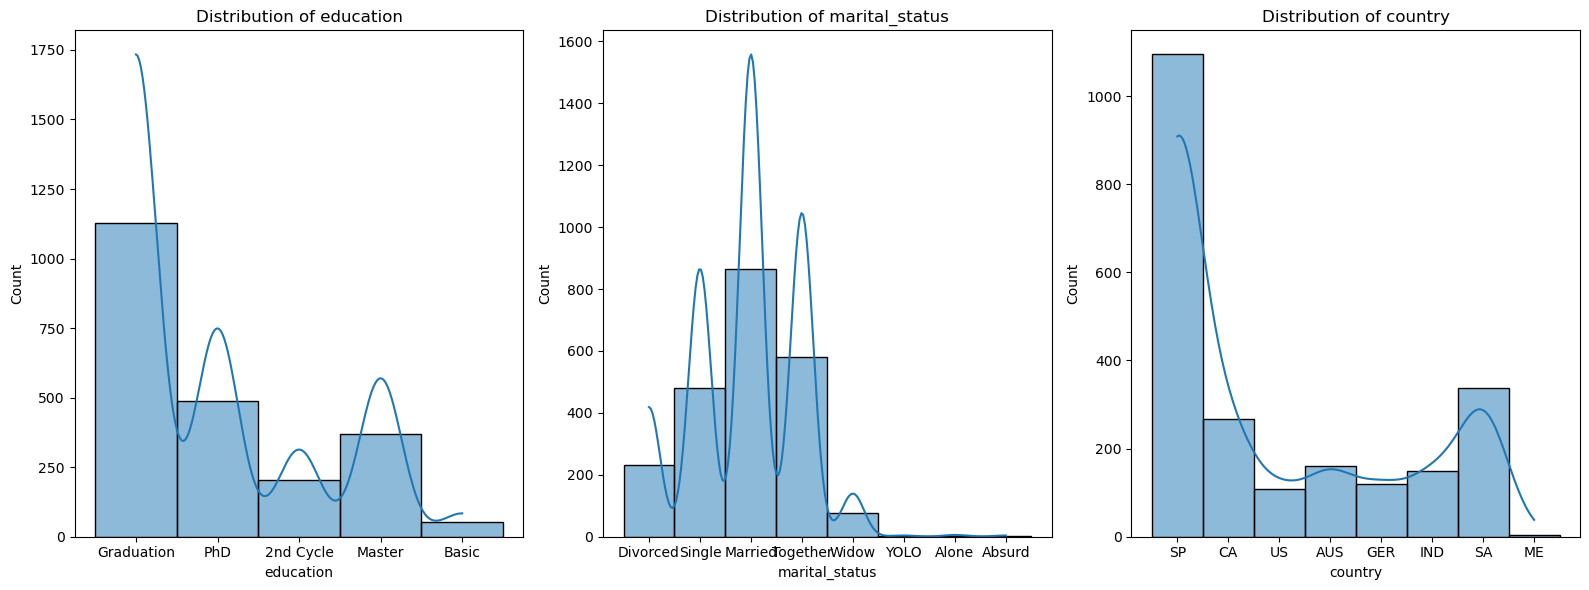

In [249]:
fig, axes = plt.subplots(1,3,figsize=(16,6))

for axes, cols in zip(axes,category_cols):
    sns.histplot(data = df3, x = cols, kde = True, ax=axes)
    axes.set_title(f"Distribution of {cols}")

plt.tight_layout()
plt.show()

In [251]:
numerical_cols = ['income', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth','age', 'dependents',
       'total_spend', 'total_purchaes']
numerical_cols


['income',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'age',
 'dependents',
 'total_spend',
 'total_purchaes']

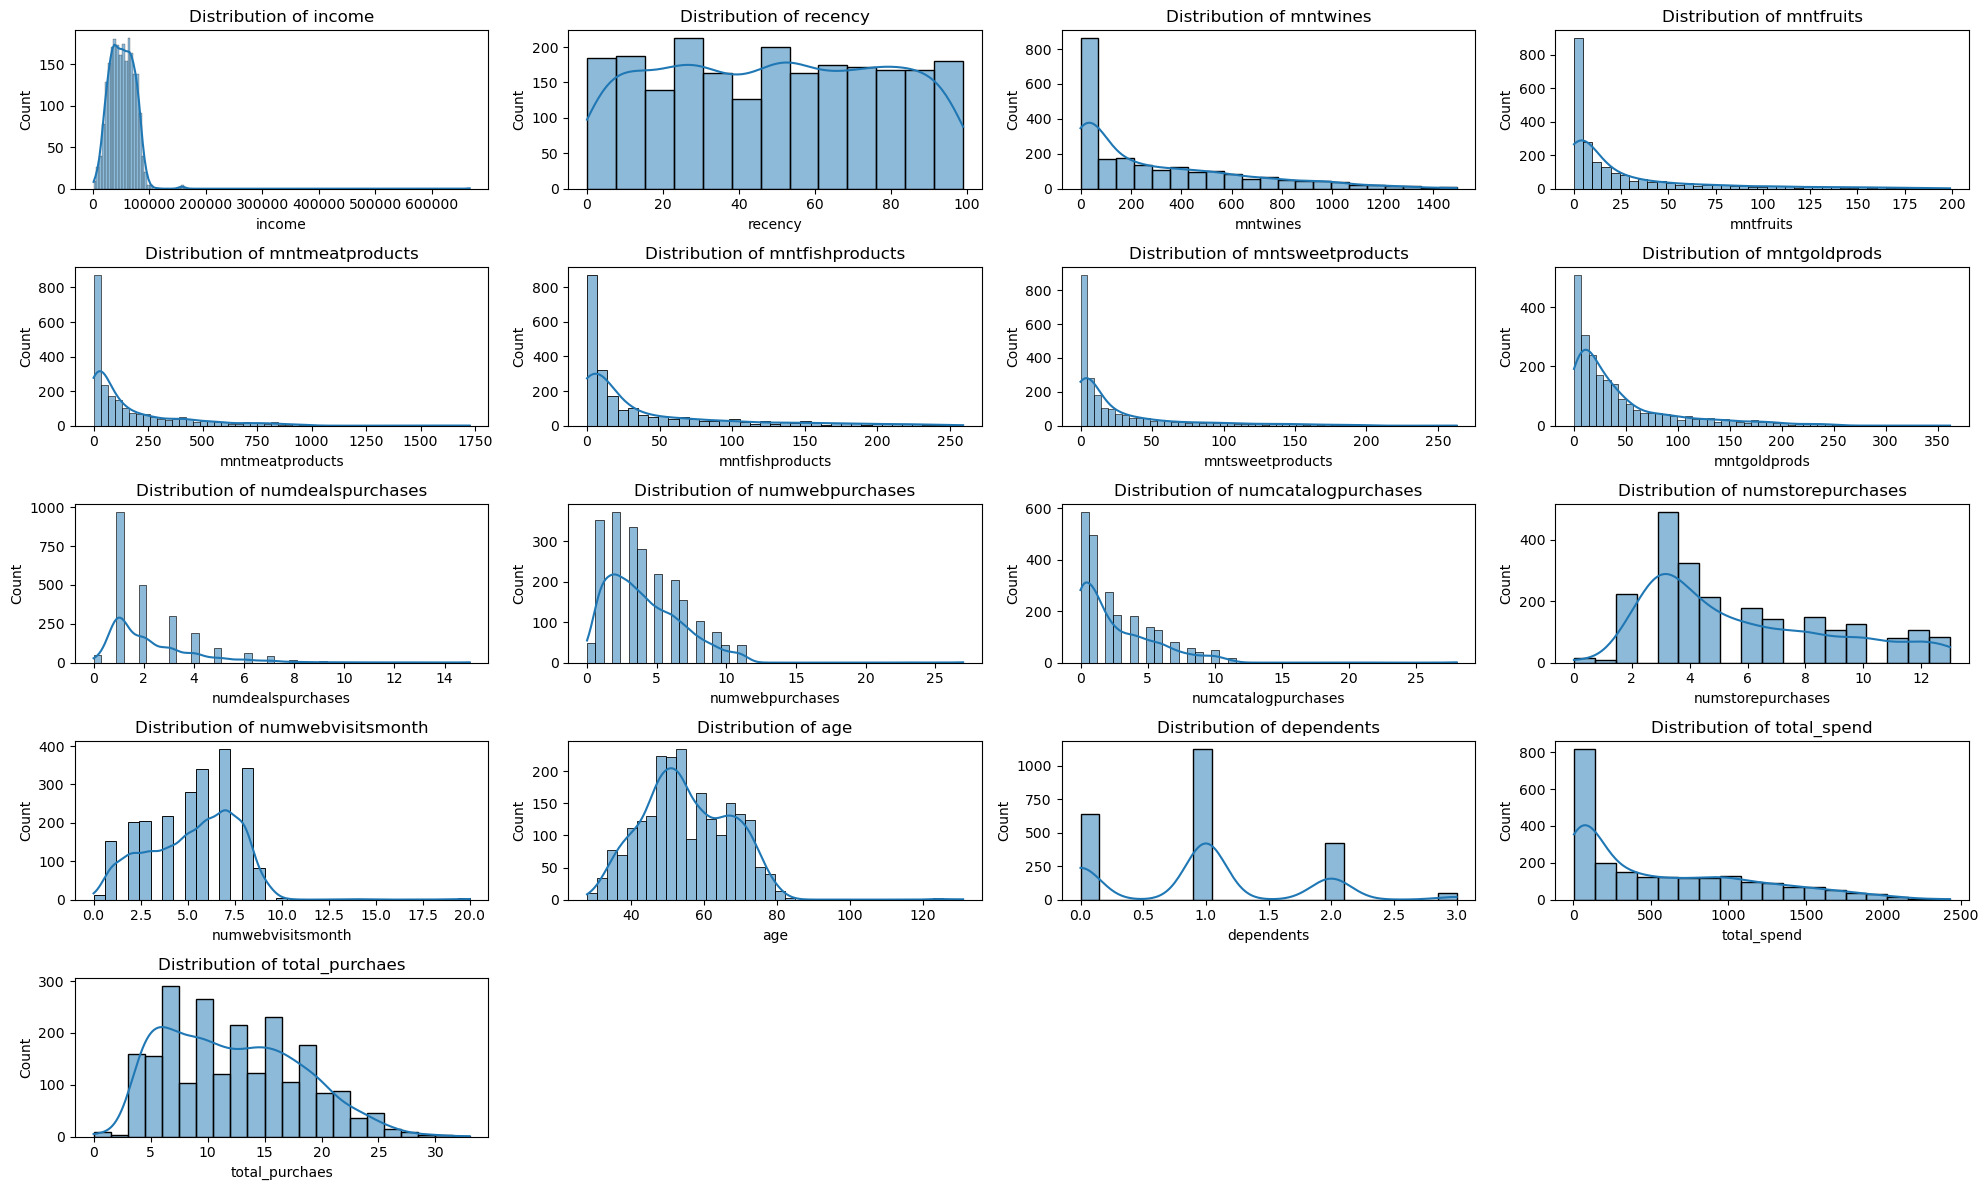

In [273]:
fig, axes = plt.subplots(5, 4, figsize=(20, 12))
axes = axes.flatten()

# Plot only the columns in `numerical_cols`
for ax, col in zip(axes, numerical_cols):
    sns.histplot(data=df3, x=col, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

# Hide any remaining empty subplots
for ax in axes[len(numerical_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


- observations:
- income is right skewed which is expected
- receny is normally distribuued
- age is normally distributed, however there are customer with age more than 100, we will consider those as outliers blindly
- total_spend is right skewed, mean total_spend make sense, which we should comeup with data
- total_purchases is normally distributed

In [229]:
binary_cols

['acceptedcmp3',
 'acceptedcmp4',
 'acceptedcmp5',
 'acceptedcmp1',
 'acceptedcmp2',
 'response',
 'complain']

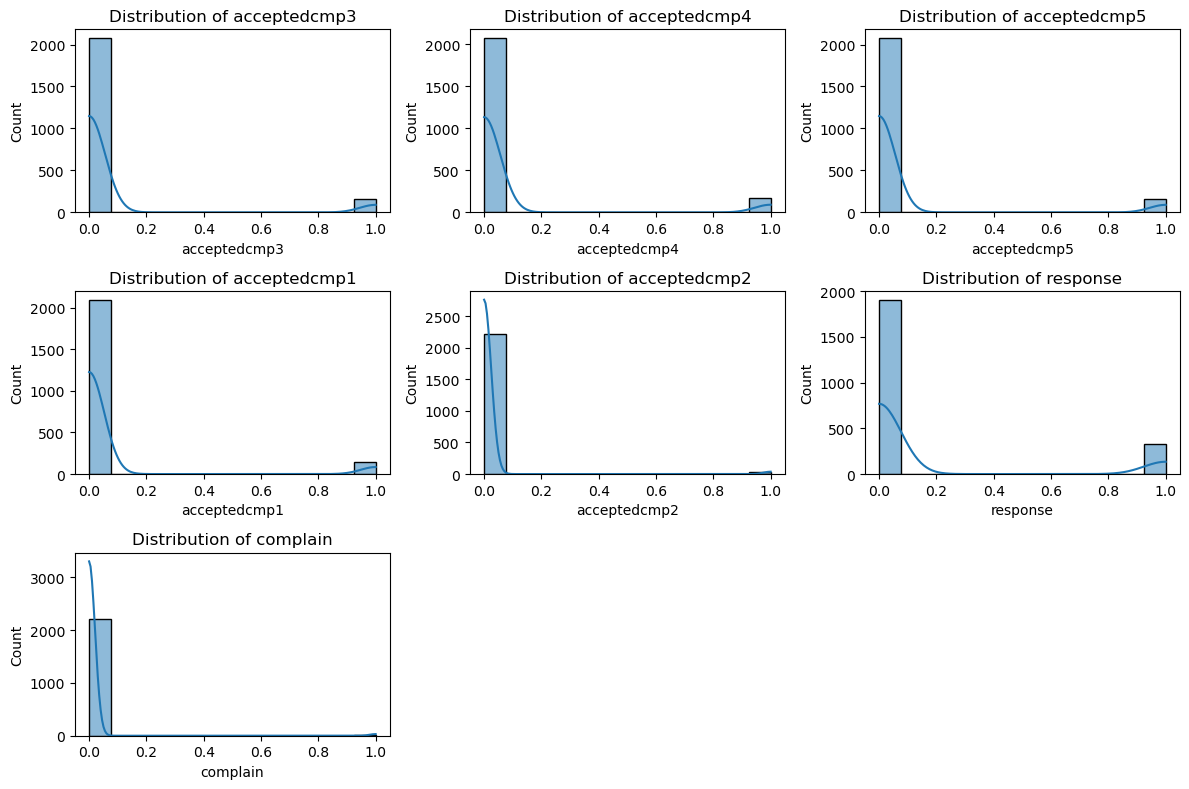

In [271]:
fig, axes = plt.subplots(3, 3, figsize=(12,8))
axes = axes.flatten()

# Plot only the columns in `numerical_cols`
for ax, col in zip(axes, binary_cols):
    sns.histplot(data=df3, x=col, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

# Hide any remaining empty subplots
for ax in axes[len(binary_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# 7 Outliers detection

## 7.1 Outlier detection using IQR

In [274]:
numerical_cols

['income',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'age',
 'dependents',
 'total_spend',
 'total_purchaes']

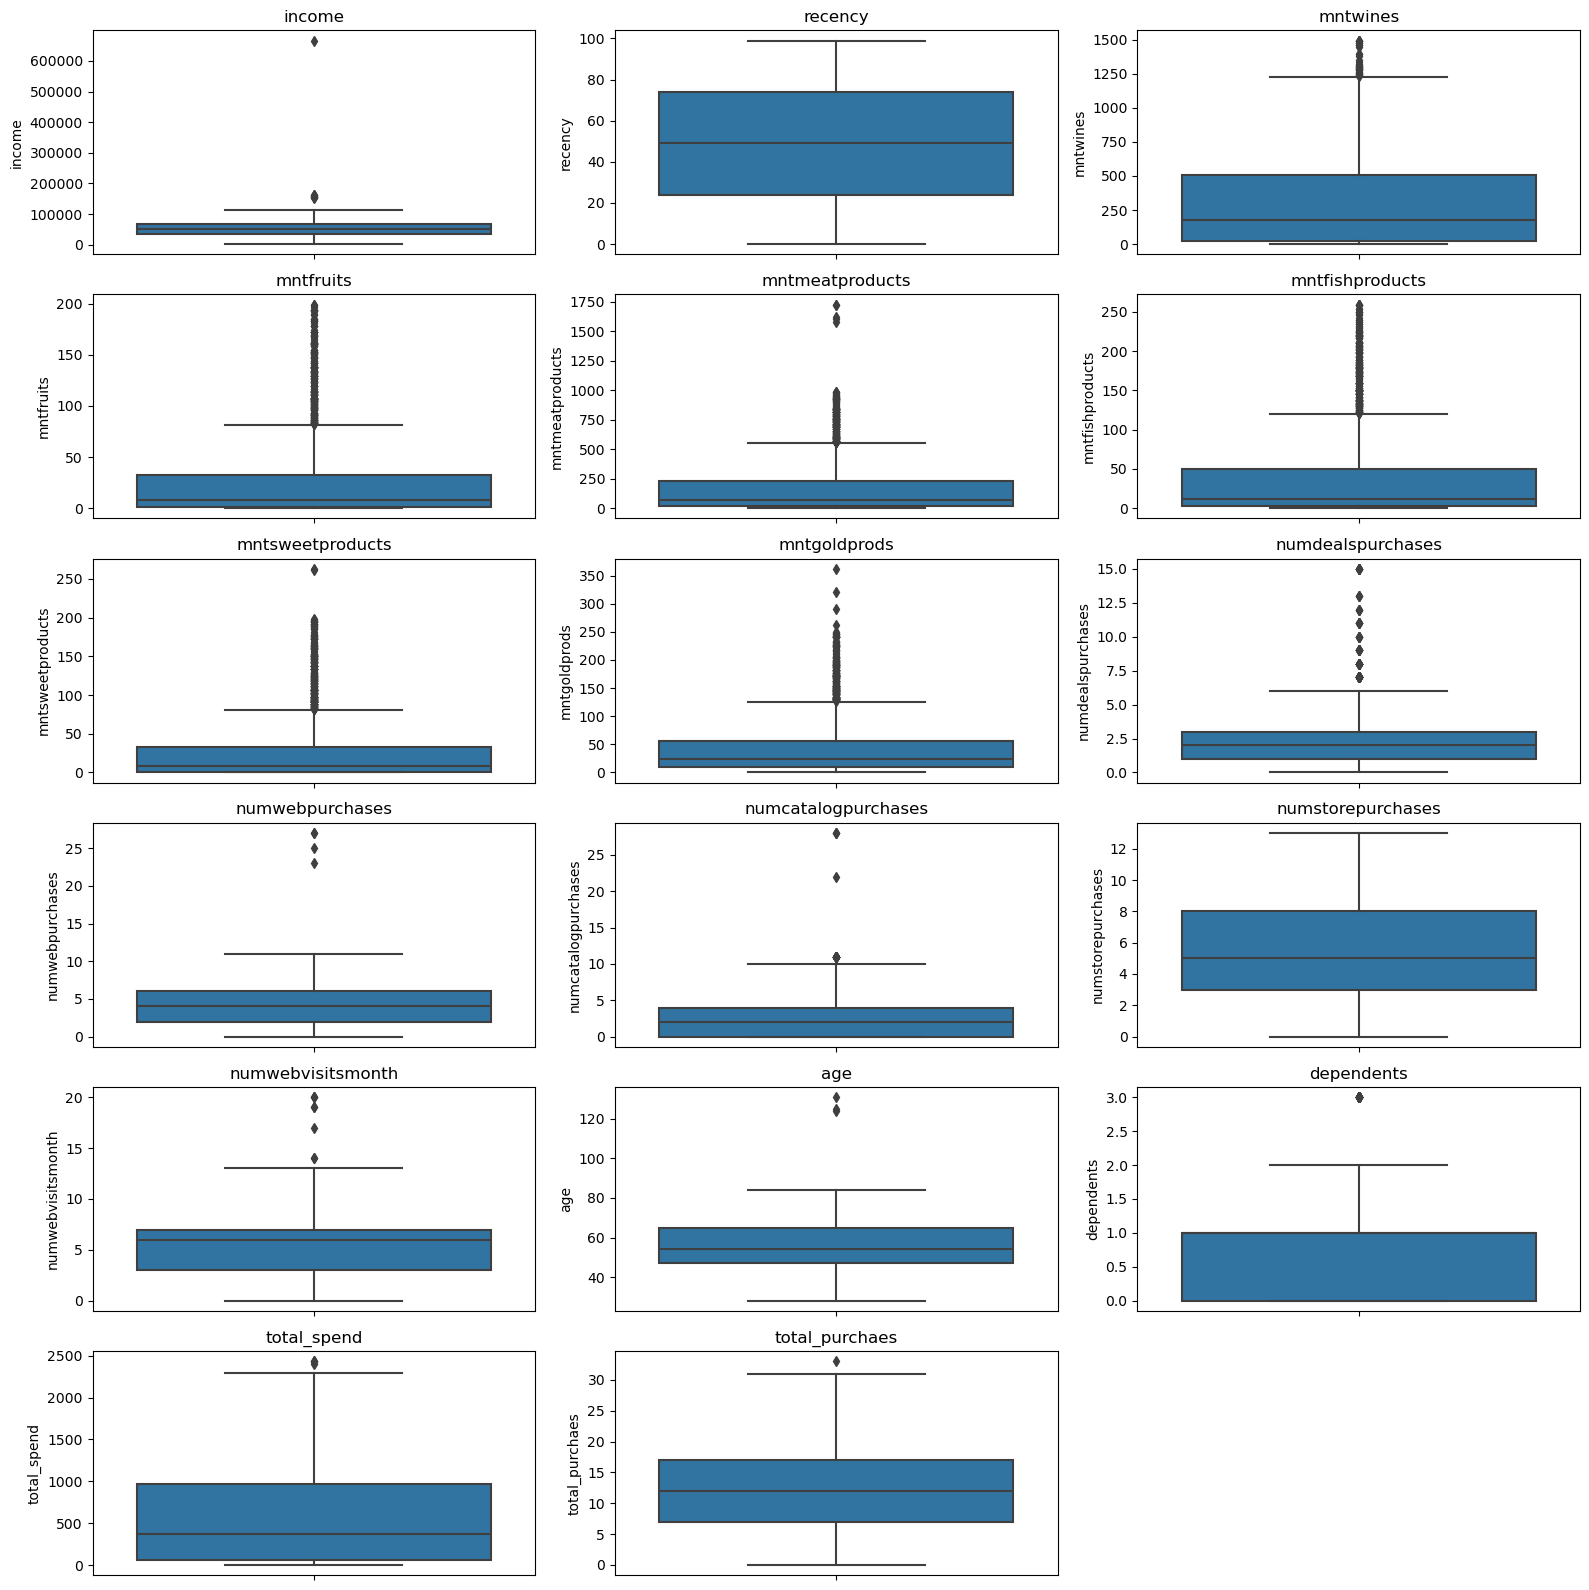

In [282]:
fig, axes = plt.subplots(6, 3, figsize=(16, 16))
axes = axes.flatten()

# Plot only the columns in `numerical_cols`
for ax, col in zip(axes, numerical_cols):
    sns.boxplot(data=df3, y=col, ax=ax)
    ax.set_title(f"{col}")

# Hide any remaining empty subplots
for ax in axes[len(numerical_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [321]:
df4 = df3[df3['age'] < 100]
df4.head()

,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,dependents,total_spend,total_purchaes
0,Graduation,Divorced,84835.0,0,189,104,379,111,189,218,...,0,0,0,1,0,SP,54,0,1079,11
1,Graduation,Single,57091.0,0,464,5,64,7,0,37,...,0,0,1,1,0,CA,63,0,570,15
2,Graduation,Married,67267.0,0,134,11,59,15,2,30,...,0,0,0,0,0,US,66,1,236,9
3,Graduation,Together,32474.0,0,10,0,1,0,0,0,...,0,0,0,0,0,AUS,57,2,11,4
4,Graduation,Single,21474.0,0,6,16,24,11,0,34,...,0,0,0,1,0,SP,35,1,80,7


In [323]:
df4.shape

(2237, 27)

In [324]:
def calculate_iqr(col):
    q3,q1 = df4[col].quantile([0.75,0.25])
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    return (lower_bound, upper_bound)

In [332]:
calculate_iqr('age')

(20.0, 92.0)

In [333]:
df4['age'].describe()

count    2236.000000
mean       55.101968
std        11.703281
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: age, dtype: float64

In [325]:
calculate_iqr('income')[1]

117418.0

In [326]:
df4[df4['income'] > calculate_iqr('income')[1]]

,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,dependents,total_spend,total_purchaes
325,Graduation,Together,157146.0,13,1,0,1725,2,1,1,...,0,0,0,0,0,SA,47,0,1728,0
497,PhD,Married,160803.0,21,55,16,1622,17,3,4,...,0,0,0,0,0,US,42,0,1700,16
527,Graduation,Together,666666.0,23,9,14,18,8,1,12,...,0,0,0,0,0,SA,47,1,54,10
731,PhD,Together,162397.0,31,85,1,16,2,1,2,...,0,0,0,0,0,SP,48,2,105,1
853,Master,Together,157733.0,37,39,1,9,2,0,8,...,0,0,0,0,0,SP,53,1,57,2
1826,Graduation,Divorced,153924.0,81,1,1,1,1,1,1,...,0,0,0,0,0,SP,49,0,5,0
1925,PhD,Married,156924.0,85,2,1,2,1,1,1,...,0,0,0,0,0,CA,75,0,7,0
2204,PhD,Married,157243.0,98,20,2,1582,1,2,1,...,0,0,0,0,0,IND,51,1,1607,15


In [330]:
df4 = df4[df4['income'] < 200000]

(2236, 27)

In [331]:
df3.shape, df4.shape

((2240, 27), (2236, 27))

In [ ]:
-observations:
- from df3 to df4 we have removed 4 records.
- 3 records from age, which are more than 100, however iqr provide 92 has upper_bound
- 1 record from income, which seems like manual error '666666'

# 8 Data Visualization

## 8.1 categorical to Numerical feature (spend)

In [334]:
category_cols

['education', 'marital_status', 'country']

In [353]:
category_to_viz = ['education', 'marital_status','country', 'dependents']

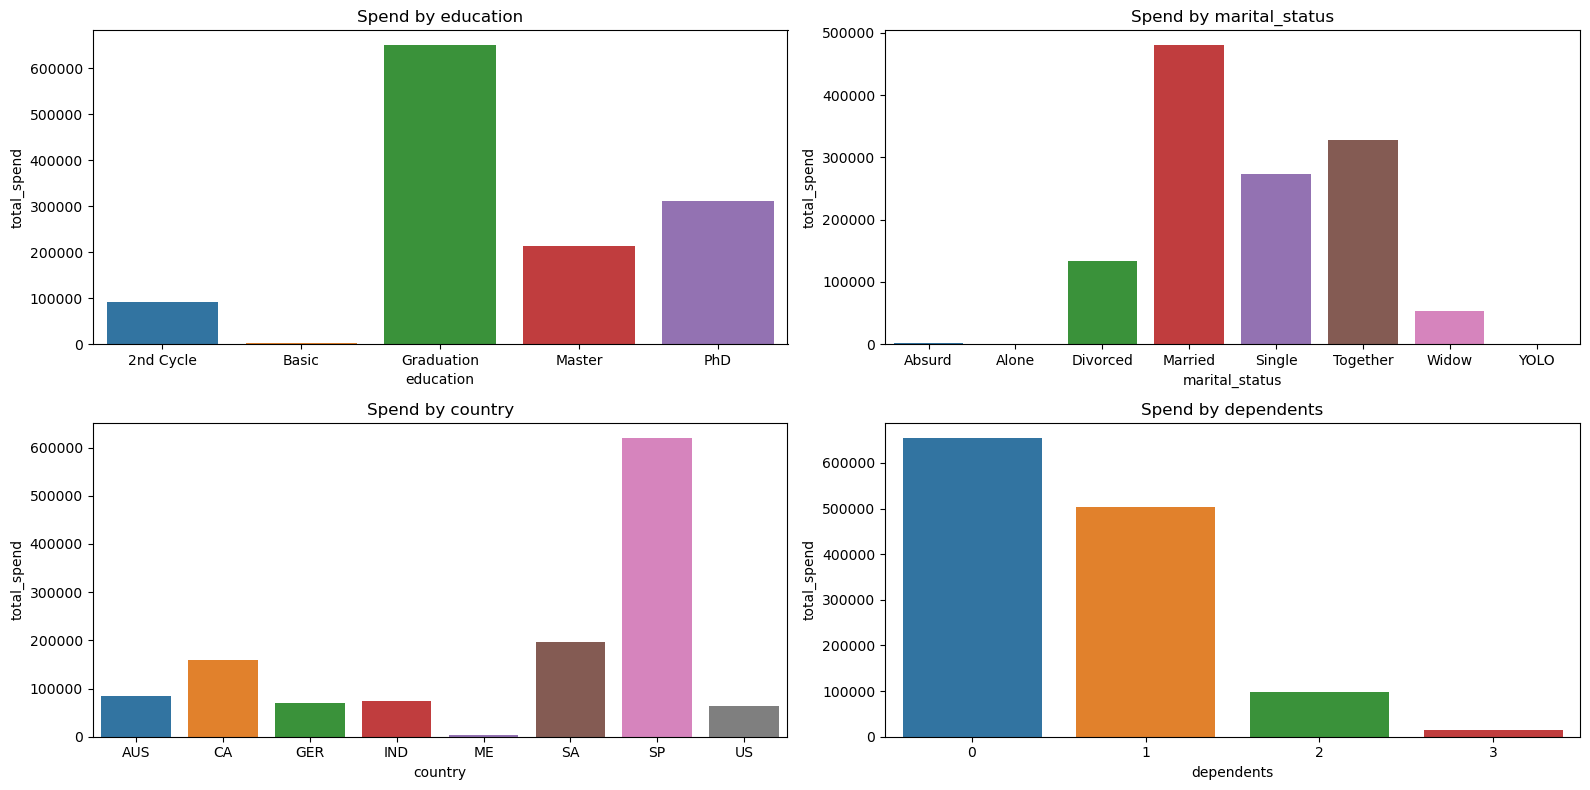

In [359]:
fig, axes = plt.subplots(2, len(category_to_viz)//2, figsize = (16,8))
axes = axes.flatten()

for ax, i in zip(axes,category_to_viz):
    grouped_data = df4.groupby(by = i)['total_spend'].sum().reset_index()
    sns.barplot(data = grouped_data, x = i, y = 'total_spend', ax=ax)
    ax.set_title(f"Spend by {i}")

for ax in axes[len(category_to_viz):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

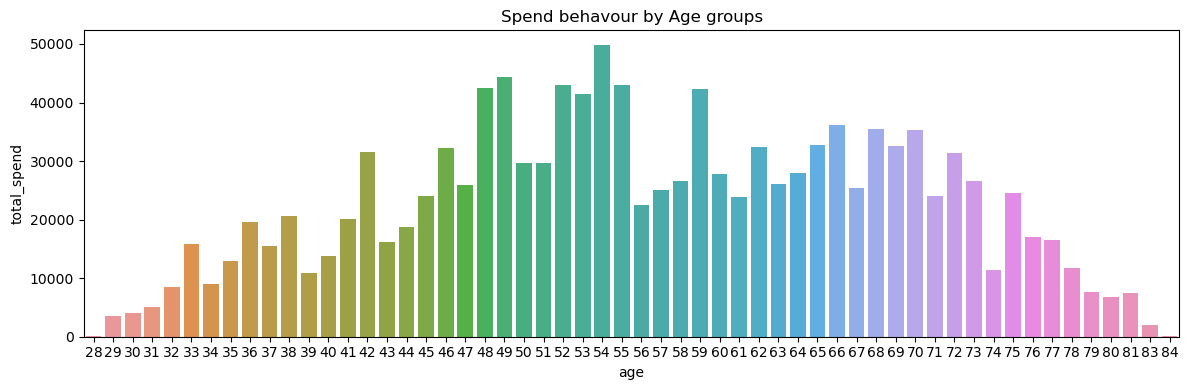

In [371]:
plt.subplots(1, 1, figsize = (12,4))

plt.subplot(1,1,1)
grouped_data = df4.groupby(by = 'age')['total_spend'].sum().reset_index()
sns.barplot(data = grouped_data, x = 'age', y = 'total_spend')
plt.title(f"Spend behavour by Age groups")

plt.tight_layout()
plt.show()

In [ ]:
observations:
- graduates spend's highest
- married class spend's highest
- 0 depends spend more, discretinary spending habits
- SP country spend's highest, we can future analysis by age groups 
- since we have wide variery of age's, we shall bin age and perform futher analysis on spend

In [380]:
age_bins =  [28, 39, 54, 69, 84]
age_labels = ['young','middle-aged','seniors','old-aged']

df4['age_group'] = pd.cut(x = df4['age'], bins = age_bins, labels=age_labels, right=True)
df4.head(3)

,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,acceptedcmp1,acceptedcmp2,response,complain,country,age,dependents,total_spend,total_purchaes,age_group
0,Graduation,Divorced,84835.0,0,189,104,379,111,189,218,...,0,0,1,0,SP,54,0,1079,11,middle-aged
1,Graduation,Single,57091.0,0,464,5,64,7,0,37,...,0,1,1,0,CA,63,0,570,15,seniors
2,Graduation,Married,67267.0,0,134,11,59,15,2,30,...,0,0,0,0,US,66,1,236,9,seniors


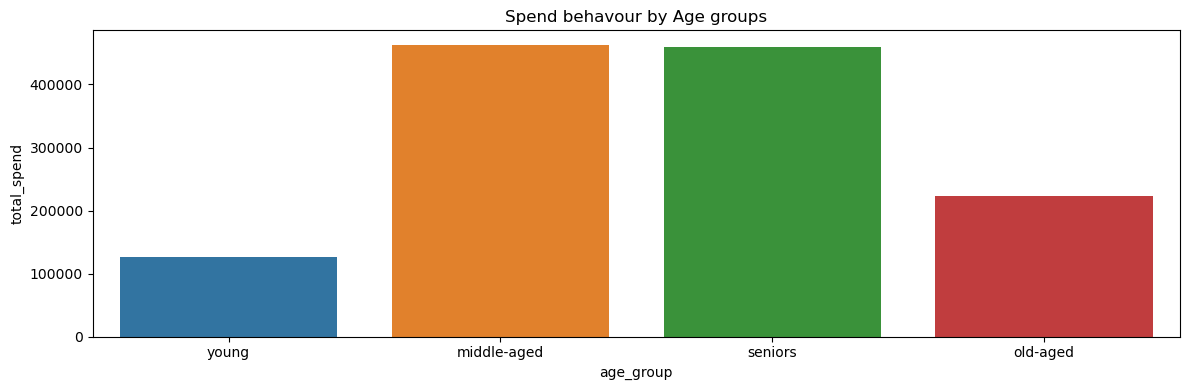

In [381]:
plt.subplots(1, 1, figsize = (12,4))

plt.subplot(1,1,1)
grouped_data = df4.groupby(by = 'age_group')['total_spend'].sum().reset_index()
sns.barplot(data = grouped_data, x = 'age_group', y = 'total_spend')
plt.title(f"Spend behavour by Age groups")

plt.tight_layout()
plt.show()

In [347]:
df4.columns

Index(['education', 'marital_status', 'income', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country', 'age', 'dependents',
       'total_spend', 'total_purchaes'],
      dtype='object')